The required predictive distribution is given by

$$\begin{align*}
p(t_{N+1} = 1|\mathbf{t}_N) = \int p(t_{N+1}=1|a_{N+1})\color{red}{p(a_{N+1}|\mathbf{t}_N)} da_{N+1} \tag{6.76} \\
\end{align*}$$

where
- $p(t_{N+1} = 1|a_{N+1}) = \sigma(a_{N+1})$ is a sigmoid function.
- $\color{red}{p(a_{N+1}|\mathbf{t}_N)}$ is a complex non-linear function. As a result, the integral is analytically intractable. There are numbers of methods to deal with this situation. Here, we shall make use of the technique called Laplace approximation that we have derived in Section 4.5.2. This method will provide us a Gaussian approximation to the distribution $p(a_{N+1}|\mathbf{t}_N)$.

The usual justification for a Gaussian approximation to a posterior distribution is that the true posterior will tend to a Gaussian as the number of data points increases as a consequence of the central limit theorem.

# Laplace approximation

$$\begin{align*}
\color{red}{p(a_{N+1}|\mathbf{t}_N)} &= \frac{p(a_{N+1}, \mathbf{t}_N)}{p(\mathbf{t}_N)} \\
&= \frac{1}{p(\mathbf{t}_N)}\int p(a_{N+1}, \mathbf{a}_N, \mathbf{t}_N) d \mathbf{a}_N\qquad \\
&= \frac{1}{p(\mathbf{t}_N)}\int p(a_{N+1}, \mathbf{a}_N)p(\mathbf{t}_N|a_{N+1}, \mathbf{a}_N) d \mathbf{a}_N \\
&= \frac{1}{p(\mathbf{t}_N)}\int p(a_{N+1}| \mathbf{a}_N)p(\mathbf{a}_N)p(\mathbf{t}_N|a_{N+1}, \mathbf{a}_N) d \mathbf{a}_N \\
&= \frac{1}{p(\mathbf{t}_N)}\int p(a_{N+1}| \mathbf{a}_N)p(\mathbf{a}_N)p(\mathbf{t}_N|\mathbf{a}_N) d \mathbf{a}_N \qquad a_{N+1}\text{ derives from } \mathbf{a}_N \text{ and } \mathbf{t}_N\\
&= \frac{1}{p(\mathbf{t}_N)}\int p(a_{N+1}| \mathbf{a}_N)p(\mathbf{t}_N, \mathbf{a}_N) d \mathbf{a}_N \\
&= \int \color{green}{p(a_{N+1}| \mathbf{a}_N)}\color{blue}{p(\mathbf{a}_N | \mathbf{t}_N)} d \mathbf{a}_N \tag{6.77}\\
\end{align*}$$

where
- $\color{green}{p(a_{N+1}| \mathbf{a}_N)}$ is the conditional distribution for Gaussian process regression.
$$\color{green}{p(a_{N+1}| \mathbf{a}_N)} = \mathcal{N}(a_{N+1}|\mathbf{k}^T\mathbf{C}_N^{-1}\mathbf{a}_N, c-\mathbf{k}^T\mathbf{C}_N^{-1}\mathbf{k})\tag{6.78}$$
- $\color{blue}{p(\mathbf{a}_N | \mathbf{t}_N)}$ is the posterior given by
$$\color{blue}{p(\mathbf{a}_N | \mathbf{t}_N)} = \frac{p(\mathbf{a}_N)p(\mathbf{t}_N|\mathbf{a}_N)}{p(\mathbf{t}_N)} = \frac{1}{p(\mathbf{t}_N)}\left( \mathcal{N}(\mathbf{a}_N|0, \mathbf{C}_N) \cdot \prod_{n=1}^N \underbrace{\sigma(a_n)^{t_n}(1-\sigma(a_n))^{1-t_n}}_{\text{Bernoulli distribution}} \right)
= \frac{1}{p(\mathbf{t}_N)}\left( \mathcal{N}(\mathbf{a}_N|0, \mathbf{C}_N) \cdot \underbrace{\prod_{n=1}^Ne^{a_nt_n}\sigma(-a_n)}_{(6.79)} \right)$$
which is the distribution that we need to evaluate its Gaussian approximation. To obtain this approximation, we can invoke the procedure of Laplace approximation as follows



1. For computational convinience, we need the Taylor expansion of the **negative logarithm** of the posterior $\color{blue}{p(\mathbf{a}_N | \mathbf{t}_N)}$ that is denoted by
$$\begin{align*}
\Psi(\mathbf{a}_N) &= -\ln p(\mathbf{a}_N|\mathbf{t}_N) \\
&= -(\ln p(\mathbf{a}_N) + \ln p(\mathbf{t}_N|\mathbf{a}_N) - \ln p(\mathbf{t}_N))\\
&\simeq -\ln \mathcal{N}(\mathbf{a}_N|0, \mathbf{C}_N) - \ln\prod_{n=1}^Ne^{a_nt_n}\sigma(-a_n) - const  \\
&= -\left(-\frac{1}{2}\mathbf{a}_N^T \mathbf{C}_N^{-1} \mathbf{a}_N - \frac{N}{2}\ln(2\pi)-\frac{1}{2}\ln|\mathbf{C}_N|\right)-\left(\mathbf{t}_N^T \mathbf{a}_N-\sum_{n=1}^N\ln(1+e^{a_n})\right) - const\\
&= \frac{1}{2}\mathbf{a}_N^T \mathbf{C}_N^{-1} \mathbf{a}_N + \frac{N}{2}\ln(2\pi) + \frac{1}{2}\ln|\mathbf{C}_N| - \mathbf{t}_N^T \mathbf{a}_N + \sum_{n=1}^N\ln(1+e^{a_n}) - const \tag{6.80}
\end{align*}$$
2. $\Psi(\mathbf{a}_N)$ is a non-linear function. For finding the minima of the function, we make use of the **IRLS** algorithm that is given by
$$\mathbf{a}_N^{\text{new}} = \mathbf{a}_N - H\nabla(\Psi(\mathbf{a}_N))$$
Thus, firstly, we need to compute the gradient of $\Psi(\mathbf{a})$
$$\nabla \Psi(\mathbf{a}_N) = \mathbf{C}_N^{-1}\mathbf{a}_N - \mathbf{t}_N + \mathbf{\sigma}_N \quad \text{where }\bbox[#e0f0ff]{\mathbf{\sigma}_N = (\sigma(a_1),\cdots,\sigma(a_N))^T}\tag{6.81}$$
And secondly, we need to compute the Hessian matrix (second order derivatives) of $\Psi(\mathbf{a})$
$$\mathbf{H} = \nabla\nabla\Psi(\mathbf{a}_N) = \mathbf{C}_N^{-1}+\mathbf{W}_N \quad \text{where } \bbox[#e0f0ff]{\mathbf{W}_N = \text{diag}\big(\sigma(a_n)(1-\sigma(a_n))\big)} \tag{6.82}$$
Substitude (6.81) and (6.82) into the IRLS equation, we obtain
$$\bbox[#e0f0ff]{\mathbf{a}_N^{\text{new}} = \mathbf{C}_N(\mathbf{I}+\mathbf{W}_N\mathbf{C}_N)^{-1}\{\mathbf{t}_N - \mathbf{\sigma}_N + \mathbf{W}_N\mathbf{a}_N\}} \tag{6.83}$$
3. These equations are iterated until they converge to the mode which we denote by $\mathbf{a}_N^\star$. At the modee, the gradient $\nabla\Psi(\mathbf{a}_N)$ will vanish. Then our Gaussian approximation to the posterior distribution $p(\mathbf{a}_N|\mathbf{t}_N)$ is given by
$$q(\mathbf{a}_N) = \mathcal{N}(\mathbf{a}_N|\mathbf{a}_N^\star, \mathbf{H}^{-1}) \tag{6.86}$$



We can now combine (6.86) with (6.78) and hence evaluate the integral (6.77).

$$\left.\begin{array}{ll}
\color{green}{p(a_{N+1}| \mathbf{a}_N)} &= \mathcal{N}(a_{N+1}|\mathbf{k}^T\mathbf{C}_N^{-1}\mathbf{a}_N, c-\mathbf{k}^T\mathbf{C}_N^{-1}\mathbf{k}) &(6.78)\\
\color{blue}{p(\mathbf{a}_N | \mathbf{t}_N)} &\simeq \mathcal{N}(\mathbf{a}_N|\mathbf{a}_N^\star, \mathbf{H}^{-1}) &(6.86)\\
\color{red}{p(a_{N+1}|\mathbf{t}_N)} &=\int \color{green}{p(a_{N+1}| \mathbf{a}_N)}\color{blue}{p(\mathbf{a}_N | \mathbf{t}_N)} d \mathbf{a}_N &(6.77)
\end{array}\right\}
\Rightarrow 
\bbox[#e0f0ff]{
\color{red}{p(a_{N+1}|\mathbf{t}_N)} = \mathcal{N}(a_{N+1}|m, \sigma^2)
\quad\left\{ \begin{array}{ll}
m  &= \mathbf{k}^T(\mathbf{t}_N-\mathbf{\sigma}_N) &(6.87)\\
\sigma^2  &= c - \mathbf{k}^T(\mathbf{W}_N^{-1}+\mathbf{C}_N)^{-1}\mathbf{k} &(6.88)
\end{array} \right.}$$



# Determine hyperparameters





A star!!!


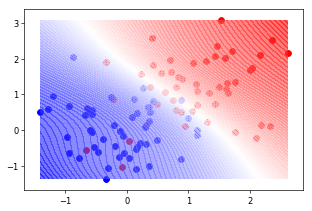

In [68]:
import matplotlib.pyplot as plt
import numpy as np


S1 = np.array([[0.5, 0.0],
               [0.0, 0.7]])
S2 = np.array([[0.4, 0.0],
               [0.0, 0.7]])
M1 = np.array([1, 1])
M2 = np.array([0, 0])

# for Covariance positive definite
V = 1
# early stopping
ITERATE_COUNTS = 10000

N = 10
sigmoid = lambda x: 1 / (1 + np.exp(-x))
kernel = lambda theta, xn, xm: theta[0]*np.exp(-theta[1]/2 * np.sum((xn-xm)**2)) + theta[2] + theta[3]*xn@xm

A = None
F = None
def Adam(derivatives):
    a0 = 0.1
    rf = 0.9
    r = 0.999
    global A, F
    if A is None:
        A = np.full(derivatives.shape, 0)
        F = np.full(derivatives.shape, 0)
    A = r*A + (1-r)*derivatives**2
    F = rf*F + (1-rf)*derivatives
    at = a0 * (np.sqrt(1-r)/(1-rf))
    return -at/(np.sqrt(A)+1e-8)*F

def gen_data(n):
    X1 = np.random.multivariate_normal(mean=M1, cov=S1, size=n)
    X2 = np.random.multivariate_normal(mean=M2, cov=S2, size=n)
    X = np.vstack((X1, X2))
    T1 = np.ones(X1.shape[0])
    T2 = np.zeros(X2.shape[0])
    T = np.hstack((T1, T2))
    return X, T

def draw_points(ax, X, T):
    for i in range(len(T)):
        if T[i]==1:
            ax.scatter(X[i][0], X[i][1], s=50, color='red')
        elif T[i]==0:
            ax.scatter(X[i][0], X[i][1], s=50, color='blue')
    return

def IRLS():
    return

def gen_convariance(X, theta):
    l = len(X)
    CN = np.zeros((l, l))
    for i in range(l):
        for j in range(l):
            CN[i][j] = kernel(theta, X[i], X[j])
            if i==j:
                CN[i][j] += V
    return CN

def partial_derivatives(X, theta, i):
    l = len(X)
    DCN = np.zeros((l, l))
    if i==0:
        for i in range(l):
            for j in range(l):
                DCN[i][j] = np.exp(-theta[1]/2 * (X[i]-X[j])**2)
    elif i==1:
        for i in range(l):
            for j in range(l):
                DCN[i][j] = theta[0] * (-1/2 * (X[i]-X[j])**2) * np.exp(-theta[1]/2 * (X[i]-X[j])**2)
    elif i==2:
        DCN = np.ones((l, l))
    elif i==3:
        for i in range(l):
            for j in range(l):
                DCN[i][j] = X[i] * X[j]
    return DCN

# Learning the hyperparameters
def hyperparameter_optmization(X, T, theta):   
    derivatives = np.zeros(4)
    for j in range(ITERATE_COUNTS):
        CN = gen_convariance(X, theta)
        ICN = np.linalg.inv(CN)
        for i in range(4):
            DCN = partial_derivatives(X, theta, i)
            derivatives[i] = -(-1/2*np.trace(ICN @ DCN) + 1/2* T @ ICN @ DCN @ ICN @ T)
        if np.allclose(derivatives, 0):
            print("stationary point found!!!")
            break
        theta += Adam(derivatives)
    return theta

def find_Astar(X, T, CN):
    length = len(T)
    aN = np.random.normal(0, 4, length)
    I = np.identity(length)
    ICN = np.linalg.inv(CN)
    for i in range(ITERATE_COUNTS):
        sigmaN = sigmoid(aN)
        gradient = ICN @ aN - T + sigmaN
        if np.allclose(gradient, 0):
            print("A star!!!")
            break
        WN = np.diag(sigmoid(aN)*(1-sigmoid(aN)))
        aN = CN @ np.linalg.inv(I + WN @ CN) @ (T - sigmaN + WN @ aN)
    return aN

def draw_border(ax, X, T, astar, theta):
    sigma = sigmoid(astar)
    xmin = np.amin(X.T[0])
    xmax = np.amax(X.T[0])
    ymin = np.amin(X.T[1])
    ymax = np.amax(X.T[1])
    x, y = np.mgrid[xmin:xmax:20j, ymin:ymax:20j]
    p = np.zeros(x.shape)
    K = np.zeros(T.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            xp = np.array([x[i][j], y[i][j]])
            for n in range(len(T)):
                K[n] = kernel(theta, xp, X[n])
            p[i][j] = K @ (T-sigma)
    ax.contourf(x, y, p, 100, cmap=plt.cm.bwr, alpha=.6)
    return

def main():
    fig = plt.figure(figsize=(6,4), dpi=60)
    ax = fig.add_subplot(1,1,1)
    X, T = gen_data(50)
    draw_points(ax, X, T)
    
    theta = np.ones(4)
    CN = gen_convariance(X, theta)
    astar = find_Astar(X, T, CN)
    
    #hyperparameter_optmization(X, T, theta)
    
    draw_border(ax, X, T, astar, theta)
    
    plt.show()
    
if __name__=="__main__":
    main()